### === Task ===

1) Learn about TFidVectorizer and replace CountVectorizer with TFIDVectorizer (Explanation Provided in the Lecture)
2) Put Multinomial Naive Classification into a class that can transform the data, fit the model and do prediction.
    - In the class, allow users to choose whether to use CountVectorizer or TFIDVectorizer to transform the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score, classification_report

Load data from sklearn datasets

In [2]:
from sklearn.datasets import fetch_20newsgroups

categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [3]:
class MultinomialNaiveClassification:
    def __init__(self, laplace=1):
        self.laplace = laplace

    def fit(self, X, y):
        self.likelihoods = self.likelihood(X, y)
        self.priors = self.priors(y)

    def predict(self, X):
        yhat = np.log(self.priors) + X_test @ np.log(self.likelihoods.T)
        return np.argmax(yhat, axis=1)

    def transform(self, train, test, method='count'):
        if method == 'count':
            vectorizer = CountVectorizer()
        elif method == 'TFID':
            vectorizer = TfidfVectorizer()
        else:
            raise ValueError
        X_train = vectorizer.fit_transform(train.data)
        y_train = train.target
        X_test = vectorizer.transform(test.data)
        y_test = test.target
        return X_train, y_train, X_test, y_test

    def likelihood(self, X, y):
        classes = np.unique(y)
        k = len(classes)
        m, n = X.shape
        likelihoods = np.zeros((k, n))
        for i, label in enumerate(classes):
            X_class_i = X[y==label]
            likelihoods[i, :] = ((X_class_i.sum(axis=0)) + self.laplace) / (np.sum(X_class_i.sum(axis=0) + self.laplace))
        return likelihoods

    def priors(self, y):
        _, counts = np.unique(y, return_counts=True)
        priors = counts / counts.sum()
        return priors


In [4]:
model = MultinomialNaiveClassification()

X_train, y_train, X_test, y_test = model.transform(train, test, method='count')

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [5]:
n_classes = len(np.unique(y_test))

print("Accuracy: ", np.sum(y_predict == y_test)/len(y_test))

print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
yhat_binarized = label_binarize(y_predict, classes=[0, 1, 2, 3])

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)
    
print("=========Classification report=======")
print("Report: ", classification_report(y_test, y_predict))

Accuracy:  0.9168994413407822
=========Average precision score=======
Class 0 score:  0.9152047938418233
Class 1 score:  0.9069918620723723
Class 2 score:  0.8429395016564877
Class 3 score:  0.7277310085946386
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.95      0.95      0.95       389
           1       0.94      0.96      0.95       394
           2       0.87      0.95      0.91       398
           3       0.92      0.74      0.82       251

    accuracy                           0.92      1432
   macro avg       0.92      0.90      0.91      1432
weighted avg       0.92      0.92      0.92      1432



Text(32.99999999999999, 0.5, 'predicted')

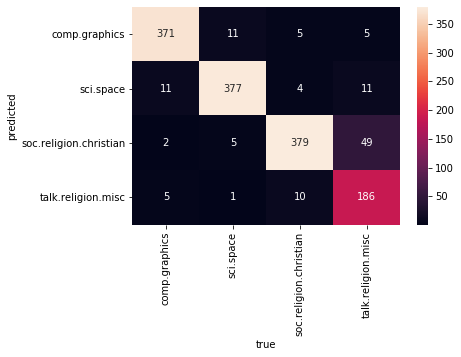

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#use confusion matrix
mat = confusion_matrix(y_test, y_predict)

sns.heatmap(mat.T, annot=True, fmt="d",
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true')
plt.ylabel('predicted')

Test using TFID as a vectorizer

In [7]:
model = MultinomialNaiveClassification()

X_train, y_train, X_test, y_test = model.transform(train, test, method='TFID')

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [8]:
n_classes = len(np.unique(y_test))

print("Accuracy: ", np.sum(y_predict == y_test)/len(y_test))

print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
yhat_binarized = label_binarize(y_predict, classes=[0, 1, 2, 3])

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)
    
print("=========Classification report=======")
print("Report: ", classification_report(y_test, y_predict))

Accuracy:  0.8016759776536313
=========Average precision score=======
Class 0 score:  0.888341920518241
Class 1 score:  0.8744630809734135
Class 2 score:  0.6122064043881043
Class 3 score:  0.332994836297269
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.97      0.88      0.92       389
           1       0.92      0.92      0.92       394
           2       0.62      0.98      0.76       398
           3       1.00      0.19      0.32       251

    accuracy                           0.80      1432
   macro avg       0.88      0.75      0.73      1432
weighted avg       0.86      0.80      0.77      1432



Text(32.99999999999999, 0.5, 'predicted')

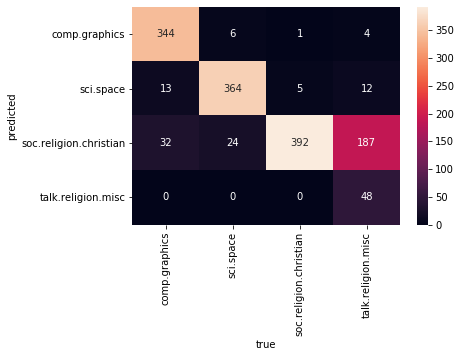

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#use confusion matrix
mat = confusion_matrix(y_test, y_predict)

sns.heatmap(mat.T, annot=True, fmt="d",
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true')
plt.ylabel('predicted')